In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

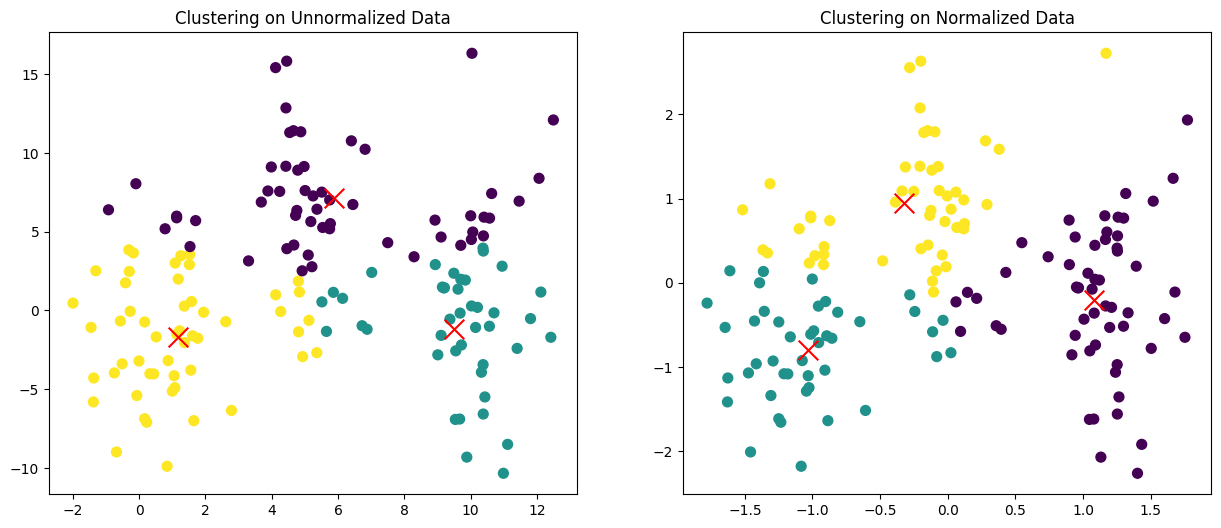

In [3]:
# Parameters
n_samples = 150
n_clusters = 3
std_x = 1  # Standard deviation along X
std_y = 5  # Expanded standard deviation along Y

# Generate synthetic data
centers = [(0, 0), (5, 5), (10, 0)]
data = []

for cx, cy in centers:
    x = np.random.normal(cx, std_x, n_samples // n_clusters)
    y = np.random.normal(cy, std_y, n_samples // n_clusters)
    data.append(np.column_stack((x, y)))

data = np.vstack(data)

# Unnormalized k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(data)
labels_unnormalized = kmeans.labels_

# Normalize data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

# Normalized k-means clustering
kmeans_normalized = KMeans(n_clusters=n_clusters, random_state=42).fit(data_normalized)
labels_normalized = kmeans_normalized.labels_

# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Unnormalized data
ax[0].scatter(data[:, 0], data[:, 1], c=labels_unnormalized, cmap='viridis', s=50)
ax[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='x')
ax[0].set_title('Clustering on Unnormalized Data')

# Normalized data
ax[1].scatter(data_normalized[:, 0], data_normalized[:, 1], c=labels_normalized, cmap='viridis', s=50)
ax[1].scatter(kmeans_normalized.cluster_centers_[:, 0], kmeans_normalized.cluster_centers_[:, 1], c='red', s=200, marker='x')
ax[1].set_title('Clustering on Normalized Data')

plt.show()

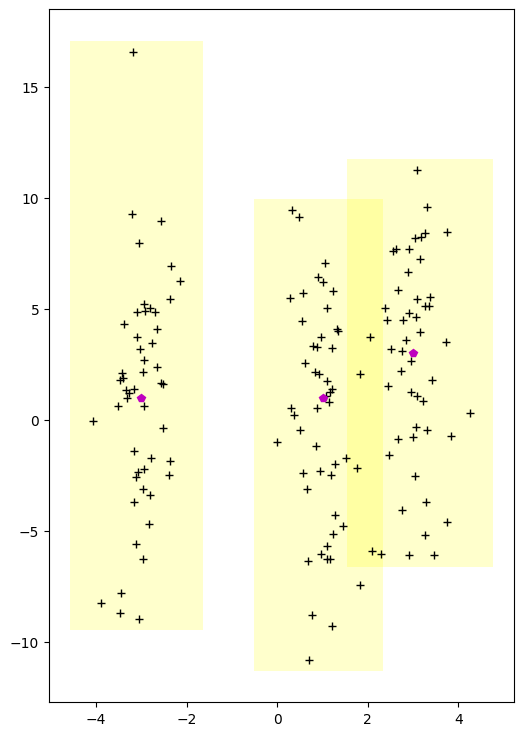

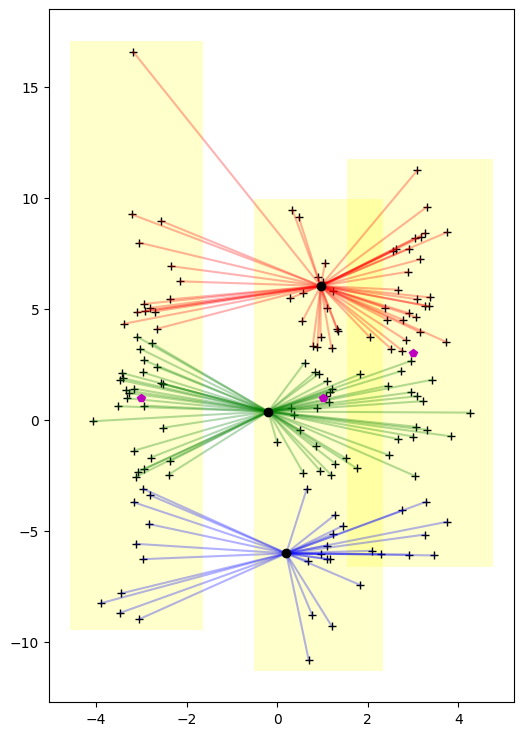

In [8]:
# Generating the data:

def get_patch(arr):
    rect_width = max(arr[0]) - min(arr[0]) + 1
    rect_height = max(arr[1]) - min(arr[1]) + 1
    
    rect = patches.Rectangle(
        ( min(arr[0])-.5, min(arr[1])-.5 ),
        rect_width, rect_height,
        facecolor='yellow', alpha=.2
    )
    return rect
 
# points per centroid
n = 50
 
# variation around centroid
blurx = .4
blury = 5
 
#  centroids
centroids = np.array([
    [ 1, 1],
    [-3, 1],
    [ 3, 3]
])
 
fig, ax = plt.subplots(figsize=(6,9))
    
# data
groups = list()
for C in centroids:
    arr = np.array([ C[0] + np.random.randn(n) * blurx, C[1] + np.random.randn(n) * blury ])
    ax.add_patch(get_patch(arr))
    groups.append(arr)
 
data = np.concatenate(groups, axis=1).T
plt.plot(data[:,0], data[:,1], 'k+')
for C in centroids:
    plt.plot(C[0], C[1], 'mp')


k = len(centroids)
kmeans = KMeans(n_clusters=k, n_init=10)
groupidx = kmeans.fit_predict(data)
cents = kmeans.cluster_centers_
 
fig, ax = plt.subplots(figsize=(6,9))
 
for g in groups:
    ax.add_patch(get_patch(g))
 
plt.plot(data[:,0], data[:,1], 'k+')
 
colors = 'rgbc'
for i, point in enumerate(data):
    group = groupidx[i]
    c = colors[group]
    cent = cents[group]
    plt.plot([point[0], cent[0]], [point[1], cent[1]], c, alpha=.3)
    plt.plot(point[0], point[1], color=c, mfc='w')
 
plt.plot(cents[:,0], cents[:,1], 'ko');
for C in centroids:
    plt.plot(C[0], C[1], 'mp')
    
